In [17]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestClassifier

In [9]:
df_main = pd.read_csv("int20h_processed.csv")

<AxesSubplot:>

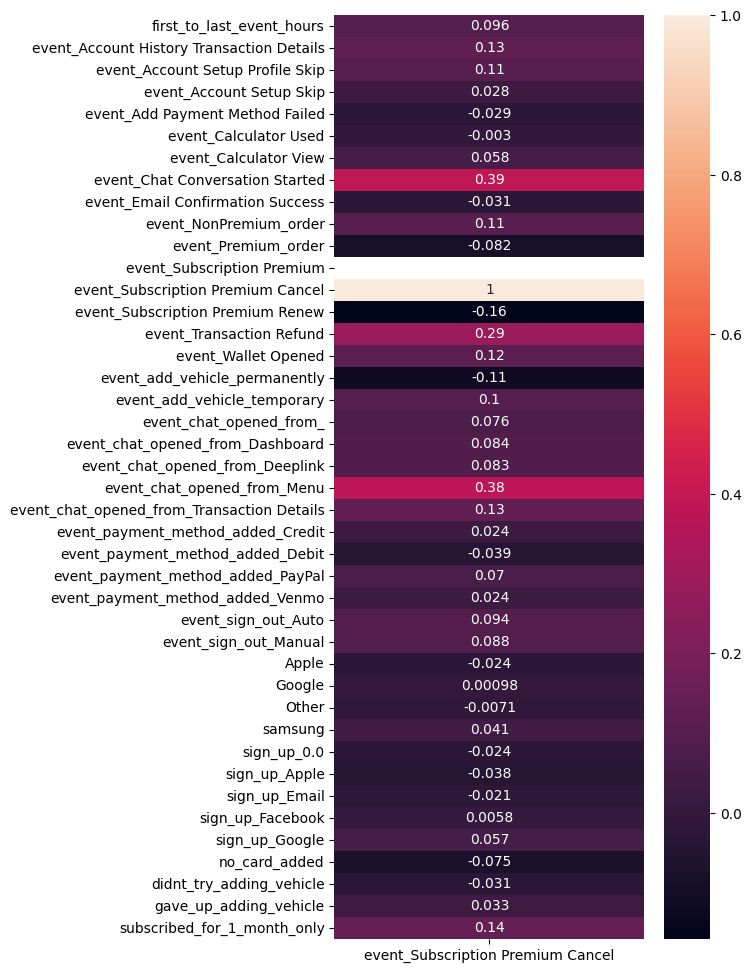

In [10]:
fig, ax = plt.subplots(figsize=(5,12))         # Sample figsize in inches
sns.heatmap(df_main.corr()[['event_Subscription Premium Cancel']], annot=True)

<AxesSubplot:>

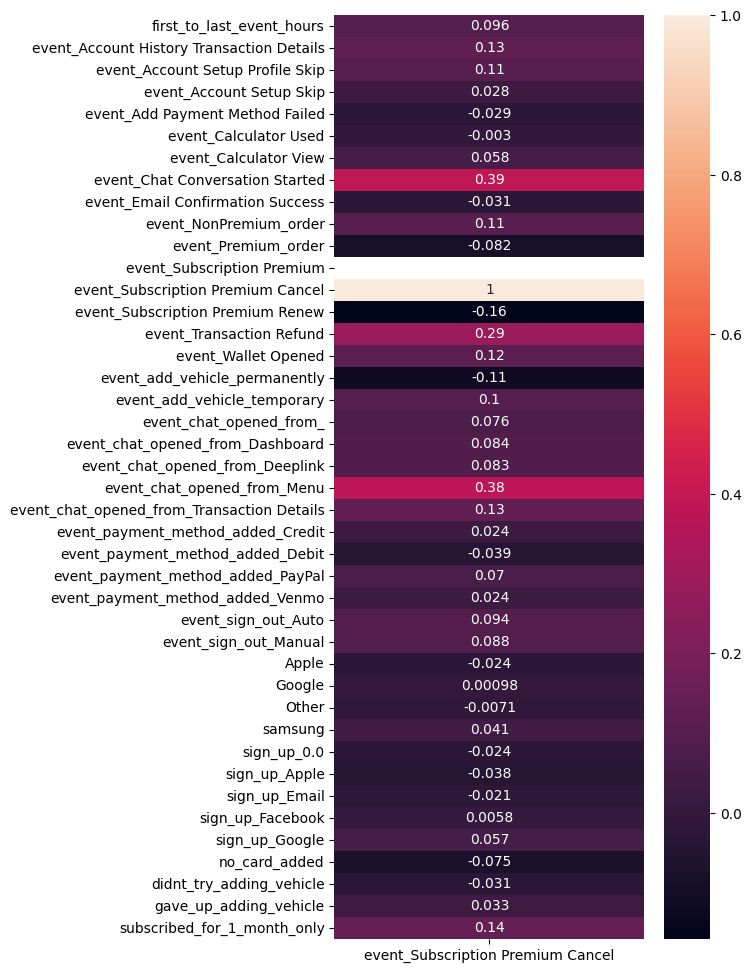

In [4]:
df_main = df_main.loc[df_main['event_Subscription Premium'].astype(bool)]
fig, ax = plt.subplots(figsize=(5,12))         # Sample figsize in inches
sns.heatmap(df_main.corr()[['event_Subscription Premium Cancel']], annot=True)

In [12]:
df_main = df_main[df_main.first_to_last_event_hours > 0]
X = df_main.drop(['event_Subscription Premium Cancel', 'event_Subscription Premium'], axis = 1)
# X = X[X.first_to_last_event_hours > 0]
y = df_main['event_Subscription Premium Cancel']
discrete_features = X.dtypes == int

mi_scores = mutual_info_regression(
    X, 
    y, 
    discrete_features=discrete_features)

mi_scores = pd.Series(mi_scores, name="MI Scores", 
                      index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

event_Chat Conversation Started               0.227962
event_chat_opened_from_Menu                   0.180035
first_to_last_event_hours                     0.085150
event_payment_method_added_Credit             0.035352
event_Subscription Premium Renew              0.034664
event_Account History Transaction Details     0.029372
event_add_vehicle_permanently                 0.028925
event_sign_out_Manual                         0.027342
no_card_added                                 0.026695
event_chat_opened_from_Deeplink               0.026352
event_NonPremium_order                        0.024272
event_Transaction Refund                      0.020204
event_Calculator View                         0.017047
event_chat_opened_from_Transaction Details    0.015235
event_payment_method_added_Venmo              0.012445
event_Account Setup Profile Skip              0.010608
event_chat_opened_from_Dashboard              0.009569
didnt_try_adding_vehicle                      0.009033
event_paym

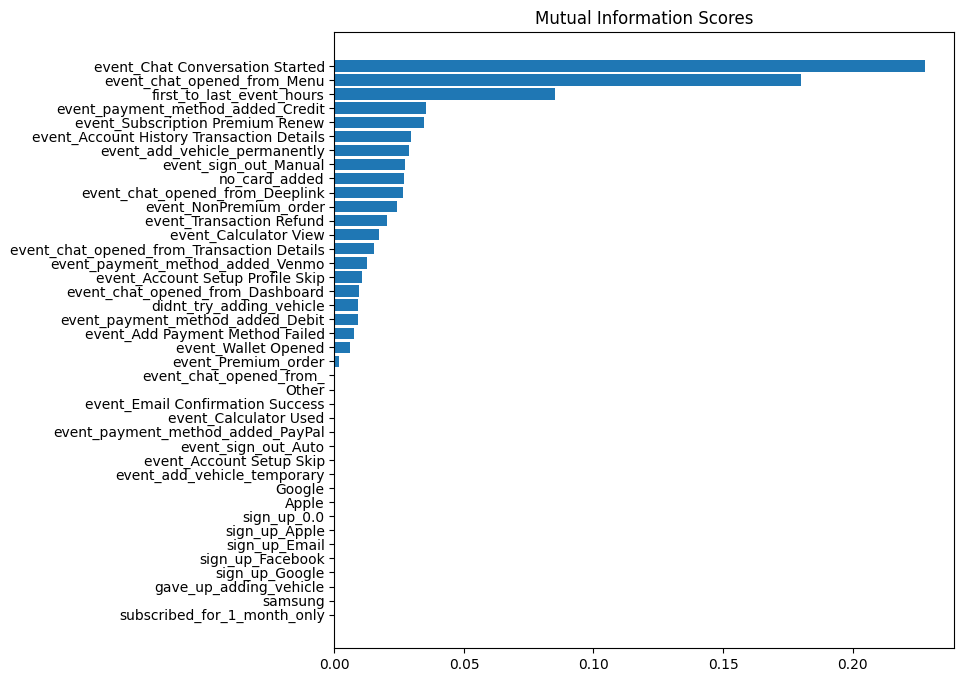

In [13]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 8))
plot_mi_scores(mi_scores)

In [16]:
df_main[df_main["event_Subscription Premium"] == 0]

,first_to_last_event_hours,event_Account History Transaction Details,event_Account Setup Profile Skip,event_Account Setup Skip,event_Add Payment Method Failed,event_Calculator Used,event_Calculator View,event_Chat Conversation Started,event_Email Confirmation Success,event_NonPremium_order,...,samsung,sign_up_0.0,sign_up_Apple,sign_up_Email,sign_up_Facebook,sign_up_Google,no_card_added,didnt_try_adding_vehicle,gave_up_adding_vehicle,subscribed_for_1_month_only


In [19]:
X = df_main.drop('event_Subscription Premium Cancel', axis=1)
y = df_main['event_Subscription Premium Cancel']
rf = RandomForestClassifier().fit(X,y)
imp = zip(rf.feature_importances_, rf.feature_names_in_)
sorted(imp, key=lambda x: x[0], reverse=True)

[(0.21025132482183312, 'event_Chat Conversation Started'),
 (0.11986249606041953, 'event_chat_opened_from_Menu'),
 (0.09505732046516023, 'first_to_last_event_hours'),
 (0.06452976287035404, 'event_Wallet Opened'),
 (0.04615167015317637, 'event_Account History Transaction Details'),
 (0.043323608317906055, 'event_Premium_order'),
 (0.042158930302203614, 'event_Transaction Refund'),
 (0.03704744801023839, 'event_Calculator View'),
 (0.023704972691843382, 'event_payment_method_added_Debit'),
 (0.023644086386057816, 'event_add_vehicle_permanently'),
 (0.019857438254616822, 'event_chat_opened_from_Transaction Details'),
 (0.018195139560150043, 'event_sign_out_Manual'),
 (0.018183372073142398, 'Apple'),
 (0.017295887078852046, 'event_Subscription Premium Renew'),
 (0.01696119599948648, 'subscribed_for_1_month_only'),
 (0.01691328592437612, 'event_Account Setup Profile Skip'),
 (0.015702976261800713, 'samsung'),
 (0.015444931074196526, 'event_chat_opened_from_Dashboard'),
 (0.0153112072737102